In [1]:
import numpy as np
import pandas as pd

def load_images(filename: str):
    images = pd.read_csv(filename)
    return (images.iloc[:, 1:].values.astype(np.uint8),
            images.iloc[:, 0].values.astype(np.uint8))

X_train, y_train = load_images('C:/Users/radha/Downloads/fashion-mnist_train.csv')
X_test, y_test = load_images('C:/Users/radha/Downloads/fashion-mnist_test.csv')

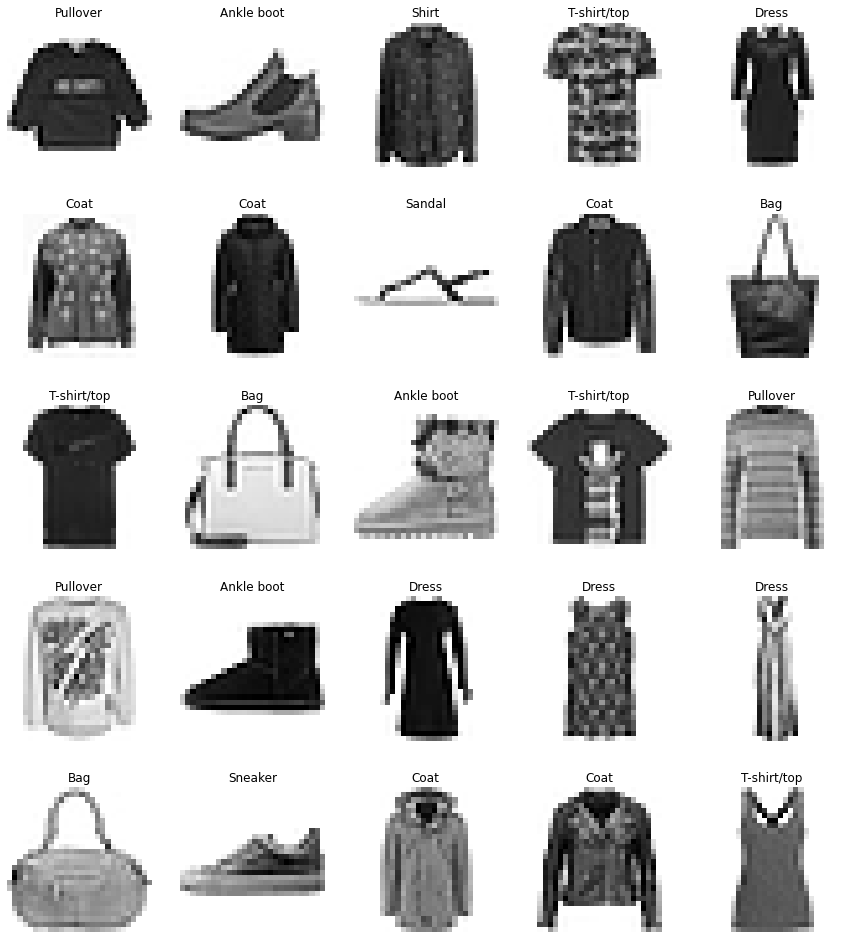

In [2]:
import matplotlib.pyplot as plt

classes = ['T-shirt/top', 'Trouser', 'Pullover',
           'Dress', 'Coat', 'Sandal', 'Shirt',
           'Sneaker', 'Bag', 'Ankle boot']

fig, ax = plt.subplots(5, 5, figsize=(15, 17))

for i in range(5):
    for j in range(5):
        image = X_train[i * 5 + j]
        label = y_train[i * 5 + j]
        ax[i][j].imshow(image.reshape(28, 28),
                        cmap='binary')
        ax[i][j].set_title(classes[label])
        ax[i][j].axis('off')

plt.show()

In [3]:
from sklearn.tree import DecisionTreeClassifier
dc = DecisionTreeClassifier()
dc.fit(X_train,y_train)
y_pred = dc.predict(X_test)

In [4]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
print(accuracy_score(y_test,y_pred))

0.7983


In [5]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.74      0.74      0.74      1000
           1       0.95      0.96      0.95      1000
           2       0.68      0.68      0.68      1000
           3       0.81      0.82      0.81      1000
           4       0.69      0.67      0.68      1000
           5       0.90      0.88      0.89      1000
           6       0.55      0.56      0.56      1000
           7       0.86      0.87      0.86      1000
           8       0.92      0.91      0.91      1000
           9       0.89      0.90      0.90      1000

    accuracy                           0.80     10000
   macro avg       0.80      0.80      0.80     10000
weighted avg       0.80      0.80      0.80     10000



In [6]:
# from sklearn.linear_model import LogisticRegression
# from sklearn.metrics import classification_report
# from sklearn.model_selection import cross_val_predict
# from sklearn.pipeline import Pipeline
# from sklearn.preprocessing import MinMaxScaler


# pipe_lr = Pipeline([
#     ('scaler', MinMaxScaler()),
#     ('lg_clf', LogisticRegression(multi_class='ovr'))
# ])

# y_pred_lr = cross_val_predict(pipe_lr, X_train, y_train,
#                               cv=5, n_jobs=-1, verbose=2)

In [7]:
# print(classification_report(y_train, y_pred_lr,
#                                 digits=4, target_names=classes))

In [8]:
# from sklearn.ensemble import RandomForestClassifier


# pipe_rf = Pipeline([
#     ('scaler', MinMaxScaler()),
#     ('rf_clf', RandomForestClassifier())
# ])

# y_pred_rf = cross_val_predict(pipe_rf, X_train, y_train,
#                               cv=5, n_jobs=-1, verbose=2)

In [9]:
# print(classification_report(y_train, y_pred_rf,
#                                 digits=4, target_names=classes))

In [10]:
# from sklearn.ensemble import VotingClassifier
# from sklearn.svm import SVC
# from sklearn.neighbors import KNeighborsClassifier

# pipe_vote = Pipeline([
#     ('scaler', MinMaxScaler()),
#     ('voting_clf', VotingClassifier(
#         estimators=[
#             ('lr', LogisticRegression(multi_class='ovr')),
#             ('rf', RandomForestClassifier())
#         ], voting='soft', n_jobs=-1))
# ])

# y_pred_voting = cross_val_predict(pipe_vote, X_train, y_train,
#                                   cv=5, n_jobs=-1, verbose=2)

In [ ]:
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import VotingClassifier

estimator = []
estimator.append(('LR', 
                  LogisticRegression())
estimator.append(('SVC', SVC(gamma ='auto', probability = True)))
vot_hard = VotingClassifier(estimators = estimator, voting ='hard')
vot_hard.fit(X_train, y_train)
y_pred = vot_hard.predict(X_test)

C:\Users\radha\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
